<a href="https://colab.research.google.com/github/noushadkhan01/Grokking-Deep-Learning/blob/master/Chapter6%20-%20Intro%20to%20Backpropagation%20-%20Building%20Your%20First%20DEEP%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a Matrix or Two in Python

In [0]:
import numpy as np
weights = np.array([0.5,0.48,-0.7])
alpha = 0.1

streetlights = np.array( [ [ 1, 0, 1 ],
                           [ 0, 1, 1 ],
                           [ 0, 0, 1 ],
                           [ 1, 1, 1 ],
                           [ 0, 1, 1 ],
                           [ 1, 0, 1 ] ] )

walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )

input = streetlights[0] # [1,0,1]
goal_prediction = walk_vs_stop[0] # equals 0... i.e. "stop"

for iteration in range(20):
    prediction = input.dot(weights)
    error = (goal_prediction - prediction) ** 2
    delta = prediction - goal_prediction
    weights = weights - (alpha * (input.T * delta))	

    print("Error:" + str(error) + " Prediction:" + str(prediction))

Error:0.03999999999999998 Prediction:-0.19999999999999996
Error:0.025599999999999973 Prediction:-0.15999999999999992
Error:0.01638399999999997 Prediction:-0.1279999999999999
Error:0.010485759999999964 Prediction:-0.10239999999999982
Error:0.006710886399999962 Prediction:-0.08191999999999977
Error:0.004294967295999976 Prediction:-0.06553599999999982
Error:0.002748779069439994 Prediction:-0.05242879999999994
Error:0.0017592186044416036 Prediction:-0.04194304000000004
Error:0.0011258999068426293 Prediction:-0.03355443200000008
Error:0.0007205759403792803 Prediction:-0.02684354560000002
Error:0.0004611686018427356 Prediction:-0.021474836479999926
Error:0.0002951479051793508 Prediction:-0.01717986918399994
Error:0.00018889465931478573 Prediction:-0.013743895347199997
Error:0.00012089258196146188 Prediction:-0.010995116277759953
Error:7.737125245533561e-05 Prediction:-0.008796093022207963
Error:4.951760157141604e-05 Prediction:-0.007036874417766459
Error:3.169126500570676e-05 Prediction:-0.0

## Building Our Neural Network

In [0]:
import numpy as np

a = np.array([0,1,2,1])
b = np.array([2,2,2,3])

print(a*b) #elementwise multiplication
print(a+b) #elementwise addition
print(a * 0.5) # vector-scalar multiplication
print(a + 0.5) # vector-scalar addition

[0 2 4 3]
[2 3 4 4]
[0.  0.5 1.  0.5]
[0.5 1.5 2.5 1.5]


# Learning the whole dataset!

In [0]:
import numpy as np
#its 1d numpy array
weights = np.array([[0.5,0.48,-0.7]]).T
alpha = 0.1

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ],
                          [ 0, 1, 1 ],
                          [ 1, 0, 1 ] ] )

walk_vs_stop = np.array([[ 0, 1, 0, 1, 1, 0 ]]).T
goal_prediction = walk_vs_stop # equals 0... i.e. "stop"
epochs = 40
n = 1
for epoch in range(epochs):
    error_for_all_lights = 0
    for row_index in range(len(walk_vs_stop)):
        #it will get 1-d numpy arry
        input = streetlights[row_index:row_index + 1, :]
        
        goal_prediction = walk_vs_stop[row_index:row_index + 1, :]
        
        #it is a 1-d array of shape (1, 1)
        prediction = input @ weights
        
        error = (goal_prediction - prediction) ** 2
        error = np.sum(error)
        error_for_all_lights += error
        
        delta = prediction - goal_prediction
        weights = weights - (alpha * (input.T * delta))
    if n % 10 == 0:
      print('-'*80)
      print(f'Iteration No.:-- {epoch + 1}')
      print('-'*40)
      print(f'error at epochs {n} / {epochs} is {error_for_all_lights}')
    n += 1
print('-'*40)
print(f'Total Error for Iteration {epochs}:-- {error_for_all_lights}')
print('-'*80)

--------------------------------------------------------------------------------
Iteration No.:-- 10
----------------------------------------
error at epochs 10 / 40 is 0.05564914990717743
--------------------------------------------------------------------------------
Iteration No.:-- 20
----------------------------------------
error at epochs 20 / 40 is 0.009117233405426495
--------------------------------------------------------------------------------
Iteration No.:-- 30
----------------------------------------
error at epochs 30 / 40 is 0.0021806703520253884
--------------------------------------------------------------------------------
Iteration No.:-- 40
----------------------------------------
error at epochs 40 / 40 is 0.00053373677328488
----------------------------------------
Total Error for Iteration 40:-- 0.00053373677328488
--------------------------------------------------------------------------------


# Our First "Deep" Neural Network

In [0]:
def initialize_weights(shape, **kwargs):
  import numpy as np
  mean = kwargs.get('mean')
  sigma = kwargs.get('sigma')
  random_state = kwargs.get('random_state')
  if not mean:
    mean = 0
  if not sigma:
    sigma = 1
  if random_state:
    np.random.seed(random_state)
  rows, cols = shape
  return sigma * np.random.randn(rows, cols) + mean

#Online Learning or StochasticGradientDescent
**it changes weights for every sample in the dataset**

In [1]:
!git clone https://github.com/noushadkhan01/my_methods/
%cd my_methods
!ls

Cloning into 'my_methods'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 342 (delta 17), reused 0 (delta 0), pack-reused 307
Receiving objects: 100% (342/342), 89.39 KiB | 324.00 KiB/s, done.
Resolving deltas: 100% (202/202), done.
/content/my_methods
choose_best_classifier.py	      my_global_variables.py
choose_best_regressor.py	      my_roc_curve.py
choose_optimal_number_of_clusters.py  plot_text.py
get_cross_validation.py		      print_model_results.py
initialize_weights.py		      README.md
my_backward_propagation.py	      sgd_neural_net.py
my_cap_curve.py			      visualise_classifier_performance.py
my_dummy_variable_creator.py


In [0]:
from sgd_neural_net import SGDNeuralNet

In [0]:
import numpy as np
streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ] ] )

X = streetlights

#we are transposing it because it's two dimensional array for our output we need row vector, corresponding to every row
y = np.array([[ 1, 1, 0, 0]]).T

In [5]:
model = SGDNeuralNet()
model.dense_layer(4, activation = 'relu')
model.dense_layer(1)
model.fit(X, y, epochs = 400, alpha = .2, n_percent = 40, random_state = 1)

Iteration no. 40 / 400, error is 0.004548996025790478
Iteration no. 80 / 400, error is 5.625829643928041e-07
Iteration no. 120 / 400, error is 5.2623596859565544e-11
Iteration no. 160 / 400, error is 4.907590822791008e-15
Iteration no. 200 / 400, error is 4.576605896771957e-19
Iteration no. 240 / 400, error is 4.2679331372396077e-23
Iteration no. 280 / 400, error is 3.973617974053911e-27
Iteration no. 320 / 400, error is 5.636726228013253e-31
Iteration no. 360 / 400, error is 2.5069917988287956e-32
Iteration no. 400 / 400, error is 2.465293696442651e-32


In [6]:
model.total_error

array([[2.4652937e-32]])

In [7]:
model.n_dense_layers

2

In [8]:
model.predict(X)

array([[1.00000000e+00],
       [1.00000000e+00],
       [9.55760196e-17],
       [0.00000000e+00]])

In [9]:
model.score(X, y)

1.0

In [10]:
model.mean_squared_error(X, y)

5.365181793610349e-33

## Backpropagation in Code

In [0]:
import numpy as np


np.random.seed(1)

def relu(x):
    return np.maximum(0, x)# returns x if x > 0
                       # return 0 otherwise

def relu2deriv(output):
    return output > 0 # returns 1 for input > 0
                    # return 0 otherwise
alpha = 0.2
hidden_size = 4
X = streetlights
y = walk_vs_stop
#initialize weights for hidden layer 1 and output layer
weights_0_1 = 2*np.random.random((3,hidden_size)) - 1
weights_output = 2*np.random.random((hidden_size,1)) - 1
for iteration in range(60):
  output_layer_error = 0
  for i in range(len(X)):
    #get 2-D array for input layer
    layer_0 = X[i:i+1]

    #dot product of layer_0 and layer2
    layer_1 = relu(np.dot(layer_0, weights_0_1))

    #dot product of layer 2 and output layer
    output_layer = np.dot(layer_1, weights_output) #it will return (1, 1) 2d array because we are doing separately for every row

    #calculate error for every row and sum it
    #its output layer
    output_layer_error += np.sum((output_layer - y[i:i+1]) ** 2) #subtracting numpy array for input and output(it will return 2d array of shape (1, 1))

    #we are calculating delta for every row separately in a loop so.......
    output_layer_delta = (y[i:i+1] - output_layer)
    
    #layer1 delta is a corresponding multplication of weights of output layer and output_layer2
    layer_1_delta = output_layer_delta*weights_output.T

    weights_output += alpha * layer_1.T.dot(output_layer_delta)
    
    #we are multiplying weights by relu2deriv function because we need to get weight 0 which have zero contribution to output
    #like if a value of layer1 is zero or less than 0 then it will not contribute to the output of layer2 so 
    #but if value fo layer1 from relu is greater than zero then it will contribute to the prediction or next layer
    weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)*relu2deriv(layer_1)
  if(iteration % 10 == 9):
    print("Error:" + str(output_layer_error))

Error:0.6342311598444467
Error:0.35838407676317513
Error:0.0830183113303298
Error:0.006467054957103705
Error:0.0003292669000750734
Error:1.5055622665134859e-05


## One Iteration of Backpropagation

In [0]:
import numpy as np

np.random.seed(1)

def relu(x):
    return (x > 0) * x 

def relu2deriv(output):
    return output>0 

lights = np.array( [[ 1, 0, 1 ],
                    [ 0, 1, 1 ],
                    [ 0, 0, 1 ],
                    [ 1, 1, 1 ] ] )

walk_stop = np.array([[ 1, 1, 0, 0]]).T

alpha = 0.2
hidden_size = 3

weights_0_1 = 2*np.random.random((3,hidden_size)) - 1
weights_1_2 = 2*np.random.random((hidden_size,1)) - 1

layer_0 = lights[0:1]
layer_1 = np.dot(layer_0,weights_0_1)
layer_1 = relu(layer_1)
layer_2 = np.dot(layer_1,weights_1_2)

error = (layer_2-walk_stop[0:1])**2

layer_2_delta=(layer_2-walk_stop[0:1])

layer_1_delta=layer_2_delta.dot(weights_1_2.T)
layer_1_delta *= relu2deriv(layer_1)

weight_delta_1_2 = layer_1.T.dot(layer_2_delta)
weight_delta_0_1 = layer_0.T.dot(layer_1_delta)

weights_1_2 -= alpha * weight_delta_1_2
weights_0_1 -= alpha * weight_delta_0_1

### Putting it all Together

In [0]:
import numpy as np

np.random.seed(1)

def relu(x):
    return (x > 0) * x # returns x if x > 0
                       # return 0 otherwise

def relu2deriv(output):
    return output>0 # returns 1 for input > 0
                    # return 0 otherwise

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ] ] )

walk_vs_stop = np.array([[ 1, 1, 0, 0]]).T
    
alpha = 0.2
hidden_size = 4

weights_0_1 = 2*np.random.random((3,hidden_size)) - 1
weights_1_2 = 2*np.random.random((hidden_size,1)) - 1

for iteration in range(60):
   layer_2_error = 0
   for i in range(len(streetlights)):
      layer_0 = streetlights[i:i+1]
      layer_1 = relu(np.dot(layer_0,weights_0_1))
      layer_2 = np.dot(layer_1,weights_1_2)

      layer_2_error += np.sum((layer_2 - walk_vs_stop[i:i+1]) ** 2)

      layer_2_delta = (layer_2 - walk_vs_stop[i:i+1])
      layer_1_delta=layer_2_delta.dot(weights_1_2.T)*relu2deriv(layer_1)

      weights_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
      weights_0_1 -= alpha * layer_0.T.dot(layer_1_delta)

   if(iteration % 10 == 9):
      print("Error:" + str(layer_2_error))

Error:0.6342311598444467
Error:0.35838407676317513
Error:0.0830183113303298
Error:0.006467054957103705
Error:0.0003292669000750734
Error:1.5055622665134859e-05


# Overfitting in neurual networks:-
  

**Sometimes correlation happens accidentally**... Consider again the first example in the training data. What if our far left weight was 0.5 and our far right weight was  -0.5. Their prediction would equal 0! The network would predict perfectly! However, it hasn't remotely learned how to safely predict streetlights (i.e. those weights would fail in the real world). This phenomenon is known as overfitting. 

**Deep Learning's Greatest Weakness:** Overfitting Error is shared between all of our weights. If a particular configuration of weights accidentally creates perfect correlation between our prediction and the output dataset (such that error == 0) without actually giving the heaviest weight to the best inputs... the neural network will stop learning. 

In [0]:
import numpy as np
X = streetlights
y = walk_vs_stop
weights = np.array([.5, 0, -.5])
alpha = 0.1
errors = []
for i in range(20):
  print(f'-'*120)
  print(f'Iteration {i + 1}')
  print('-'*80)
  total_error = 0
  for j in range(len(X)):
    print('-'*40)
    print(f'row no. {j + 1}')
    input = X[j]
    
    pred = input.dot(weights)
    error = (pred - y[j])**2
    total_error += error
    
    delta = pred - y[j]
    weight_delta = delta * (alpha  * input)
    print(f'Weights for this row:=  {weights}\n prediction:=  {pred} \n actual:- {y[j]} \n error:= {error}\n delta:= {delta} \n weight_delta:= {weight_delta}')
    weights -= weight_delta
    print('-'*40)
  errors.append(total_error)
  print(f'Total erro for iteration {i+ 1} is {total_error}')
  print('-'*80)

------------------------------------------------------------------------------------------------------------------------
Iteration 1
--------------------------------------------------------------------------------
----------------------------------------
row no. 1
Weights for this row:=  [ 0.5  0.  -0.5]
 prediction:=  0.0 
 actual:- 0 
 error:= 0.0
 delta:= 0.0 
 weight_delta:= [0. 0. 0.]
----------------------------------------
----------------------------------------
row no. 2
Weights for this row:=  [ 0.5  0.  -0.5]
 prediction:=  -0.5 
 actual:- 1 
 error:= 2.25
 delta:= -1.5 
 weight_delta:= [-0.   -0.15 -0.15]
----------------------------------------
----------------------------------------
row no. 3
Weights for this row:=  [ 0.5   0.15 -0.35]
 prediction:=  -0.35 
 actual:- 0 
 error:= 0.12249999999999998
 delta:= -0.35 
 weight_delta:= [-0.    -0.    -0.035]
----------------------------------------
----------------------------------------
row no. 4
Weights for this row:=  [ 0.

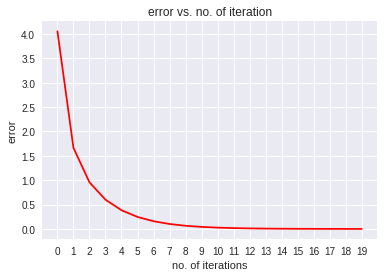

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(figsize = (10, 5))
plt.plot(range(20), errors, c = 'r')
plt.xticks(range(20))
plt.xlabel('no. of iterations')
plt.ylabel('error')
plt.title('error vs. no. of iteration')
plt.show()

In [0]:
np.random.rand(3)

(3,)

In [0]:
import numpy as np
X = streetlights
y = walk_vs_stop
weights = np.random.rand(3)
alpha = 0.1
errors = []
for i in range(20):
  print(f'-'*120)
  print(f'Iteration {i + 1}')
  print('-'*80)
  total_error = 0
  for j in range(len(X)):
    print('-'*40)
    print(f'row no. {j + 1}')
    input = X[j]
    
    pred = input.dot(weights)
    error = (pred - y[j])**2
    total_error += error
    
    delta = pred - y[j]
    weight_delta = delta * (alpha  * input)
    print(f'Weights for this row:=  {weights}\n prediction:=  {pred} \n actual:- {y[j]} \n error:= {error}\n delta:= {delta} \n weight_delta:= {weight_delta}')
    weights -= weight_delta
    print('-'*40)
  errors.append(total_error)
  print(f'Total erro for iteration {i+ 1} is {total_error}')
  print('-'*80)

------------------------------------------------------------------------------------------------------------------------
Iteration 1
--------------------------------------------------------------------------------
----------------------------------------
row no. 1
Weights for this row:=  [0.41542217 0.87914998 0.18513392]
 prediction:=  0.6005560883019421 
 actual:- 0 
 error:= 0.36066761519653007
 delta:= 0.6005560883019421 
 weight_delta:= [0.06005561 0.         0.06005561]
----------------------------------------
----------------------------------------
row no. 2
Weights for this row:=  [0.35536656 0.87914998 0.12507831]
 prediction:=  1.0042282886857148 
 actual:- 1 
 error:= 1.7878425209743684e-05
 delta:= 0.004228288685714787 
 weight_delta:= [0.         0.00042283 0.00042283]
----------------------------------------
----------------------------------------
row no. 3
Weights for this row:=  [0.35536656 0.87872715 0.12465548]
 prediction:=  0.12465547812793612 
 actual:- 0 
 error

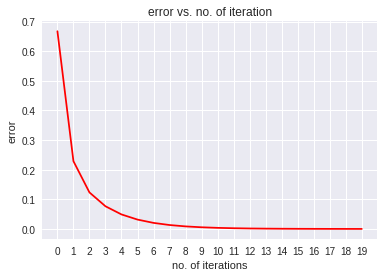

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(figsize = (10, 5))
plt.plot(range(20), errors, c = 'r')
plt.xticks(range(20))
plt.xlabel('no. of iterations')
plt.ylabel('error')
plt.title('error vs. no. of iteration')
plt.show()